### Title: Data Classification


#### Task 1: Data pre-processing and data exploration 

In [179]:
import pandas as pd
import numpy as np

In [180]:
pwd

'/Users/abubakarbajwa'

#### (A)


In [181]:
df_train_set = pd.read_csv('/Users/abubakarbajwa/Desktop/Assignment/trainingSet.csv')
df_test_set = pd.read_csv('/Users/abubakarbajwa/Desktop/Assignment/testingSet.csv')

In [182]:
df_train_set.head(3)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1


In [183]:
df_test_set.head(3)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,1,5,0,1,3,2,1,18,30,50,13,12,24,1
1,0,1,0,0,1,1,1,10,10,12,10,6,16,-1
2,0,7,0,0,4,4,1,21,30,46,19,11,25,1


#### (B) Find the number of patterns in each class for both loaded data sets using Python

In [184]:
df_train_set['DEFECTIVE'].value_counts()

 1    182
-1    182
Name: DEFECTIVE, dtype: int64

In [185]:
df_test_set['DEFECTIVE'].value_counts()

 1    68
-1    68
Name: DEFECTIVE, dtype: int64

#### (c) Choose an attribute and generate a boxplot for the two classes in the training set



In [186]:
%matplotlib inline
import matplotlib.pyplot as plt

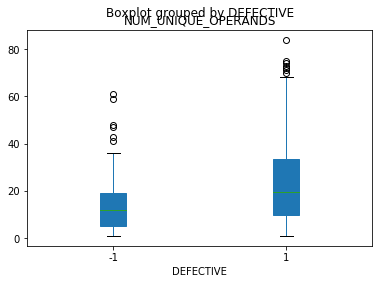

In [187]:
df_train_set.boxplot(by ='DEFECTIVE', column =['NUM_UNIQUE_OPERANDS'], grid = False,  patch_artist=True,) 

#### (d) Show one scatter plot, that is, one feature against another feature. It is your choice to show which two features you want to use. You need to use the training set

In [188]:
rng = np.random.RandomState(421)
colors = rng.rand(364)
#sizes = 100 * rng.rand(364)

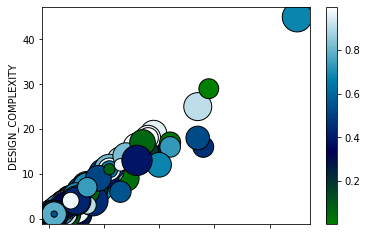

In [189]:
df_train_set.plot.scatter(x='CYCLOMATIC_COMPLEXITY',y='DESIGN_COMPLEXITY', s=sizes , c=colors, cmap = 'ocean', edgecolor='black', marker='o')

#### (e) Divide the original training set into a smaller training set (II) and a validation set. In this task, you need to use 55% of total training data points as the validation se



In [190]:
from sklearn.model_selection import train_test_split
x = df_train_set.iloc[:, 0:13].values
y = df_train_set.iloc[:, 13].values

In [191]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.55,)

In [192]:
X_train.size

2119

In [193]:
X_val.size

2613

### Task 2: Do a principal component analysis



#### (a) Perform a PCA analysis on the original training data set



In [194]:
from sklearn.decomposition import PCA

In [211]:
"""pca = PCA(n_components = None)"""
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_

explained_variance

array([9.63681849e-01, 2.13319838e-02, 5.71403314e-03, 3.76517998e-03,
       2.15197871e-03, 1.47118667e-03, 7.99835924e-04, 6.14631509e-04,
       2.89436084e-04, 1.05162089e-04, 4.98177045e-05, 1.87173175e-05,
       6.18768689e-06])

#### (b) Plot a scree plot to report variances captured by each principal component 

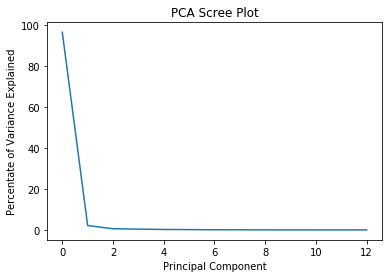

In [212]:
percent_variance = np.round(explained_variance* 100, decimals =2)
plt.plot(percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

#### (c) Project the test set on the same PCA space produced by the original training dataset

In [213]:
X_test = df_test_set.iloc[:, 0:13].values
y_test = df_test_set.iloc[:, 13].values
X_test = pca.transform(X_test)

#### (d) Plot two subplots in one figure: one for the training data in the PC1 and PC2 projection space and label the data in the picture according to its class; the other one for the test data in the same PCA space and label the data in the picture according to its class

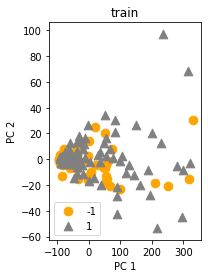

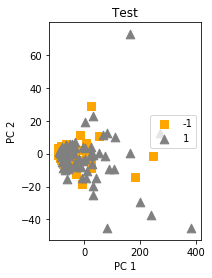

In [214]:
X_train_pca_2 = X_train[:,:2]
plt.subplot(1,2,1)
colors = ['orange', 'grey']
markers = ['o', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca_2[y_train==l, 0], 
                X_train_pca_2[y_train==l, 1], 
                c=c,s=75, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('train')
plt.legend(loc='lower left')
plt.show()


X_test_pca_2 = X_test[:,:2]
plt.subplot(1,2,2)

colors = ['orange', 'grey']
markers = ['s', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_test_pca_2[y_test==l, 0], 
                X_test_pca_2[y_test==l, 1], 
                c=c,s=75, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='center right')
plt.title('Test')
plt.show()

### Task 3: Do a classification using the Naïve Bayes Classification model

In [215]:
X_train = train_set.iloc[:, 0:13].values
y_train = train_set.iloc[:, 13].values

X_test = test_set.iloc[:, 0:13].values
y_test = test_set.iloc[:, 13].values

In [216]:
classification = GaussianNB()
classification.fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 61.76470588235294


### Task 4: Investigate how the number of features in the training dataset affects the model performance on the validation set

#### (A)

In [217]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.55,)

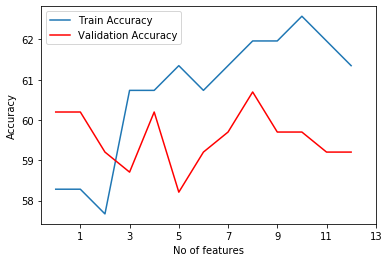

In [218]:
k_range = range(1, 14)
train_accuracy = []
val_accuracy = []
for k in k_range:
    clf = GaussianNB()
    clf.fit(X_train[:,:k], y_train)
    y_train_pred = clf.predict(X_train[:,:k])
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred) * 100)
    y_val_pred = clf.predict(X_val[:,:k])
    val_accuracy.append(metrics.accuracy_score(y_val, y_val_pred) * 100)
    


plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(val_accuracy, 'r', label="Validation Accuracy")
plt.legend()
plt.xticks([1,3,5,7,9,11,13])
plt.xlabel("No of features")
plt.ylabel("Accuracy")
plt.show()

#### (b) Report what is the best number of features you would like to use in this work and explain why you choose it. Write it down in your Jupyter notebook

Choose 13 number of features because its accuracy is best in validation set which was unseen data for the model. That means it is performing well on unseen data with 13 number of features.

#### (c) Use the selected number of features to train the model and report the performance on the test set

In [219]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 62.5


### Task 5: Finding and Conclusion.

in this task machine learning model trained using Gaussian naive bayes algorithm to predict the defect based on different features.It was managed to get an accuracy of around 60%.according to me its accuracy will be further improved by increasing the amount of data.Most of the time more data means better perfomance of model.